In [1]:
import numpy as np
import matplotlib.pyplot as plt
import swiftest
from astroquery.jplhorizons import Horizons

In [2]:
swiftersim = swiftest.Simulation(param_file="param.swifter.in", codename="Swifter")
swiftersim.bin2xr()
swifterdat = swiftersim.ds

Reading Swifter file param.swifter.in
Reading in time 1.000e+03
Creating Dataset
Successfully converted 1001 output frames.
Swifter simulation data stored as xarray DataSet .ds


In [4]:
nogrsim = swiftest.Simulation(param_file="param.swiftest.nogr.in")
nogrsim.bin2xr()
nogrdat = nogrsim.ds

Reading Swiftest file param.swiftest.nogr.in

Creating Dataset
Successfully converted 1001 output frames.
Swiftest simulation data stored as xarray DataSet .ds


In [5]:
swiftestsim = swiftest.Simulation(param_file="param.swiftest.in")
swiftestsim.bin2xr()
swiftestdat = swiftestsim.ds

Reading Swiftest file param.swiftest.in

Creating Dataset
Successfully converted 1001 output frames.
Swiftest simulation data stored as xarray DataSet .ds


In [6]:
swifterdat['varpi'] = swifterdat['omega'] + swifterdat['capom']
swiftestdat['varpi'] = swiftestdat['omega'] + swiftestdat['capom']
nogrdat['varpi'] = nogrdat['omega'] + nogrdat['capom']

In [7]:
obj = Horizons(id='1', id_type='majorbody',location='@sun',
               epochs={'start':'2021-01-28', 'stop':'3021-02-05',
                       'step':'1y'})
el = obj.elements()
t = (el['datetime_jd']-el['datetime_jd'][0]) / 365.25
varpi_obs = el['w'] + el['Omega']

In [8]:
varpiswiftest = swiftestdat['varpi'].sel(id=1) 
varpinogr = nogrdat['varpi'].sel(id=1)
varpiswifter = swifterdat['varpi'].sel(id=1) * 180.0 / np.pi
tsim = swiftestdat['time']

In [9]:
dvarpi_swiftest = np.diff(varpiswiftest)  * 3600 * 100 
dvarpi_swifter = np.diff(varpiswifter)  * 3600 * 100 
dvarpi_nogr = np.diff(varpinogr) * 3600 * 100
dvarpi_obs = np.diff(varpi_obs) / np.diff(t) * 3600 * 100 

Mean precession rate for Mercury long. peri. (arcsec/100 y)
Swiftest WHM No GR       : 528.5802151329052
Swiftest WHM GR          : 571.5193636321641
JPL Horizons         : 571.3210506300043
Obs - Swiftest No GR : 42.740835497099155
Obs - Swiftest GR    : -0.19831300215981776


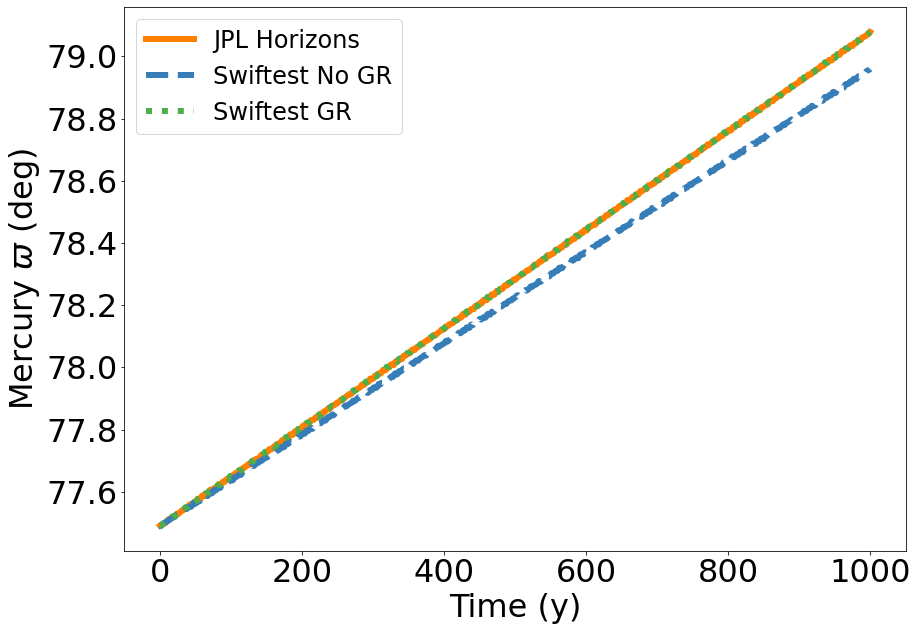

In [26]:
axes_fontsize = 32
legend_fontsize = 24
CB_color_cycle = ['#377eb8', '#ff7f00', '#4daf4a',
                  '#f781bf', '#a65628', '#984ea3',
                  '#999999', '#e41a1c', '#dede00']
fig = plt.figure(1, figsize=(14,10), facecolor="white")
ax = fig.add_subplot(111)
plt.setp(ax.get_xticklabels(), fontsize=axes_fontsize)
plt.setp(ax.get_yticklabels(), fontsize=axes_fontsize)
ax.plot(t, varpi_obs, label="JPL Horizons", linestyle='-',linewidth=6,c=CB_color_cycle[1])
ax.plot(tsim, varpinogr, label="Swiftest WHM No GR", linestyle='--', linewidth=6, c=CB_color_cycle[0])
ax.plot(tsim, varpiswiftest, label="Swiftest WHM GR", linestyle=':', linewidth=6,c=CB_color_cycle[2])
ax.set_xlabel("Time (y)", fontsize=axes_fontsize)
ax.set_ylabel("Mercury $\\varpi$ (deg)", fontsize=axes_fontsize)
ax.legend(loc="upper left", fontsize=legend_fontsize, markerscale=1)
print('Mean precession rate for Mercury long. peri. (arcsec/100 y)')
print(f'Swiftest WHM No GR   : {np.mean(dvarpi_nogr)}')
print(f'Swiftest WHM GR      : {np.mean(dvarpi_swiftest)}')
print(f'JPL Horizons         : {np.mean(dvarpi_obs)}')
print(f'Obs - Swiftest No GR : {np.mean(dvarpi_obs - dvarpi_nogr)}')
print(f'Obs - Swiftest GR    : {np.mean(dvarpi_obs - dvarpi_swiftest)}')
